In [70]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
base_dir = 'fp32-90'

In [83]:
eval_dirs = list(filter(lambda x: "eval-model.ckpt-" in x, os.listdir(base_dir)))
eval_steps = sorted(map(lambda x : int(x[len("eval-model.ckpt-"):]), eval_dirs))
eval_dirs = list(map(lambda x: "eval-model.ckpt-%d" % x, eval_steps))

In [84]:
columns=("steps", "top1", "top5")
acc_dict = {k: [] for k in columns}
for eval_step, eval_dir in zip(eval_steps, eval_dirs):
    obj = json.load(open(f"{base_dir}/{eval_dir}/acc.json"))
    acc_dict["steps"].append(eval_step)
    acc_dict["top1"].append(obj["top1_accuracy"])
    acc_dict["top5"].append(obj["top5_accuracy"])
df = pd.DataFrame(acc_dict)
df.to_csv(f"{base_dir}/{base_dir}-acc.csv", index=False)

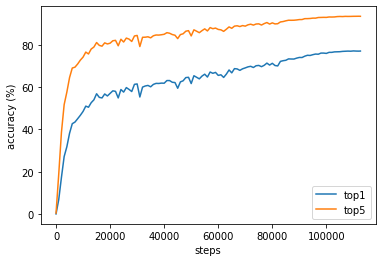

In [85]:
plt.plot(df.steps, df.top1, label="top1")
plt.plot(df.steps, df.top5, label="top5")
plt.xlabel("steps")
plt.ylabel("accuracy (%)")
plt.legend()
plt.show()

In [ ]:
plt.plot?f

In [57]:
df.to_csv?

Signature:
df.to_csv(
    path_or_buf=None,
    sep=',',
    na_rep='',
    float_format=None,
    columns=None,
    header=True,
    index=True,
    index_label=None,
    mode='w',
    encoding=None,
    compression=None,
    quoting=None,
    quotechar='"',
    line_terminator='\n',
    chunksize=None,
    tupleize_cols=None,
    date_format=None,
    doublequote=True,
    escapechar=None,
    decimal='.',
)
Docstring:
Write DataFrame to a comma-separated values (csv) file

Parameters
----------
path_or_buf : string or file handle, default None
    File path or object, if None is provided the result is returned as
    a string.
sep : character, default ','
    Field delimiter for the output file.
na_rep : string, default ''
    Missing data representation
float_format : string, default None
    Format string for floating point numbers
columns : sequence, optional
    Columns to write
header : boolean or list of string, default True
    Write out the column names. If a list of strings